# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 9: Dimensionality Reduction and Application: Image Recognition

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns#; sns.set()

## Reading: 

- Dimensionality Reduction: PDSW CH5 In Depth: Principal Component Analysis
- Image Recognition: PDSW CH5 Application: A Face Detection Pipeline

## Today

- Dimensionality Reduction

- Image Recognition

- Dynamic Visualization

## Dimensionality Reduction

#### Why do dimensionality reduction?

- performance (speed, accuracy)

- analysis (feature selection)

- curse of dimensionality

### Feature Selection

 - variance

 - univariate tests

 - model based (eg. LASSO, tree feature imoportances)

### Principle Component Analysis (PCA)

 - unsupervised

- center and rotate

- components are orthogonal vectors explaining variance

In [2]:
# stock price returns for Chevron (CVX) and Exxon-Mobil (XOM)
df = pd.read_csv('../data/sp500_px.csv')
df = df[['CVX','XOM']]

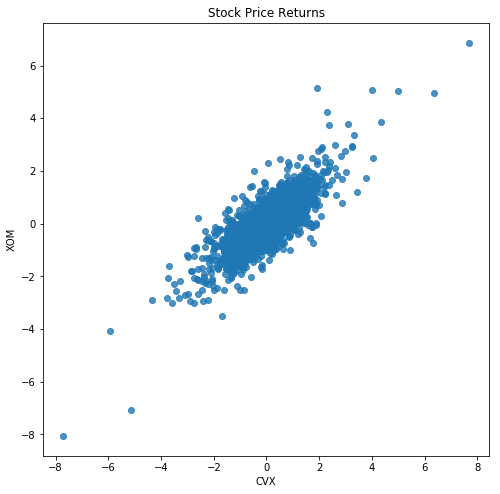

In [3]:
fig = plt.figure(figsize=(8,8))
_ = sns.regplot(x='CVX',y='XOM',data=df,fit_reg=False)
_ = plt.title('Stock Price Returns')
_ = plt.gca().set_aspect('equal')

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df)

In [5]:
pca.explained_variance_

array([ 0.77822489,  0.0904673 ])

In [6]:
pca.components_

array([[-0.74710069, -0.66471089],
       [-0.66471089,  0.74710069]])

In [7]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=3,
                    shrinkA=0,shrinkB=0
                   )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [8]:
pca.components_[0]

array([-0.74710069, -0.66471089])

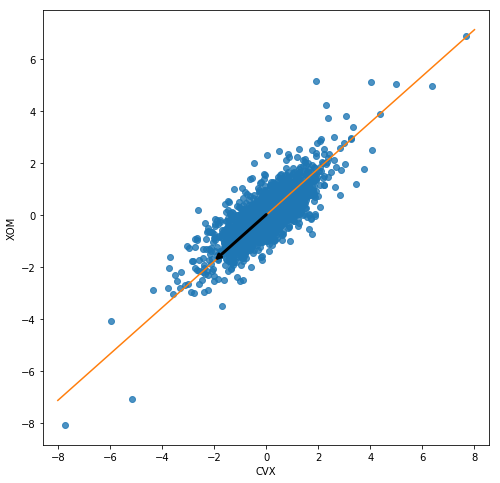

In [9]:
fig = plt.figure(figsize=(8,8))
_= sns.regplot(x='CVX',y='XOM',data=df,fit_reg=False)
v = pca.components_[0] * 3 * np.sqrt(pca.explained_variance_[0])
draw_vector(pca.mean_,pca.mean_ + v)
slope0 = pca.components_[0][1] / pca.components_[0][0]
_ = plt.plot([-8,8],[slope0*-8,slope0*8])
_ = plt.axis('equal')

In [10]:
pca.components_[1]

array([-0.66471089,  0.74710069])

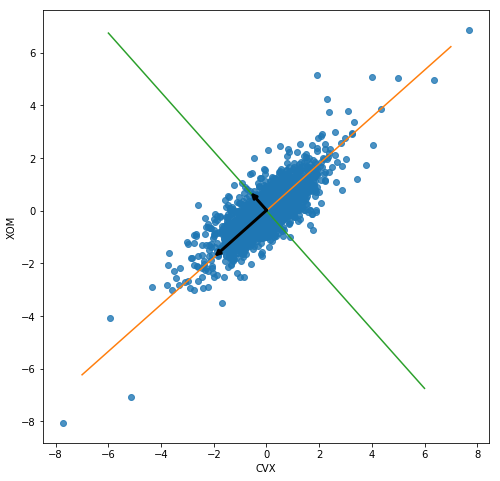

In [11]:
fig = plt.figure(figsize=(8,8))
_= sns.regplot(x='CVX',y='XOM',data=df,fit_reg=False)
slope0 = pca.components_[0][1] / pca.components_[0][0]
slope1 = pca.components_[1][1] / pca.components_[1][0]
_= plt.plot([-7,7],[slope0*-7,slope0*7])
_= plt.plot([-6,6],[slope1*-6,slope1*6])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
_ = plt.gca().set_aspect('equal')

In [12]:
X = pca.transform(df)

In [13]:
df.shape,X.shape

((5647, 2), (5647, 2))

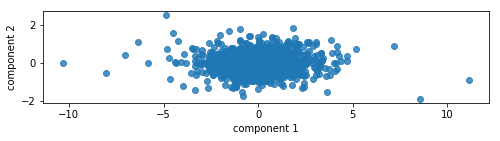

In [14]:
fig = plt.figure(figsize=(8,8))
_= sns.regplot(X[:,0],X[:,1],fit_reg=False)
_ = plt.xlabel('component 1')
_ = plt.ylabel('component 2')
_ = plt.gca().set_aspect('equal')

In [15]:
# stock price returns for Chevron (CVX), Exxon-Mobil (XOM) and Apple (AAPL)
df = pd.read_csv('../data/sp500_px.csv')
df = df[['CVX','XOM','AAPL']]

#### 3d Scatter Plot

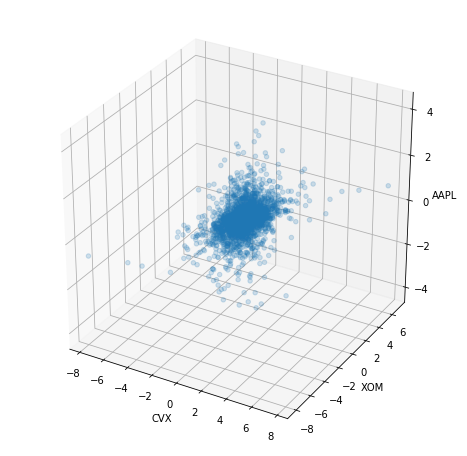

In [16]:
from mpl_toolkits import mplot3d
#%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
_ = ax.scatter3D(df['CVX'],df['XOM'],df['AAPL'], alpha=.2)
_ = ax.set(xlabel='CVX',ylabel='XOM',zlabel='AAPL')

In [17]:
import plotly as py
import  plotly.graph_objs as go

#%matplotlib inline
py.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(x=df['CVX'],y=df['XOM'],z=df['AAPL'],
                      mode='markers',
                      marker=dict(size=5,opacity=0.2))
layout = go.Layout(scene = dict(xaxis=dict(title='CVX'),yaxis=dict(title='XOM'),zaxis=dict(title='AAPL')))
fig = go.Figure(data=[trace1],layout=layout)
py.offline.iplot(fig)
#_ = ax.set(xlabel='CVX',ylabel='XOM',zlabel='AAPL')

In [18]:
pca = PCA(n_components=2).fit(df)
pca.explained_variance_

array([ 0.80415972,  0.22016816])

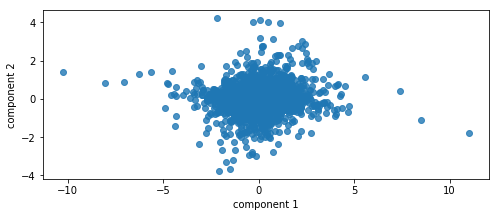

In [19]:
X = pca.transform(df)

fig = plt.figure(figsize=(8,8))
_= sns.regplot(X[:,0],X[:,1],fit_reg=False)
_ = plt.xlabel('component 1')
_ = plt.ylabel('component 2')
_ = plt.gca().set_aspect('equal')

In [20]:
pca = PCA(n_components=3).fit(df)
pca.explained_variance_

array([ 0.80415972,  0.22016816,  0.09032899])

In [21]:
pca.components_

array([[-0.7311725 , -0.64883418, -0.21071541],
       [ 0.13576895,  0.16429949, -0.97702225],
       [-0.66854586,  0.74298041,  0.03203974]])

### Review

- Uses of dimensionality reduction
- Feature selection vs Feature engineering

## Image Recognition

In [159]:
from skimage import data, color, feature
import skimage.data

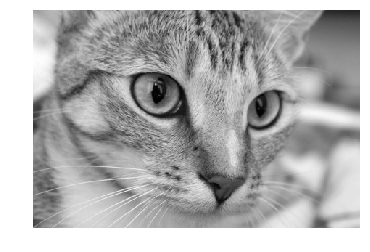

In [162]:
image = color.rgb2gray(data.chelsea())
_ = plt.imshow(image, cmap='gray')
_ = plt.gca().axis('off')

#### What are the features?

- pixel values

- color histograms

- texture features

 - decompositions

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
from sklearn.datasets import load_digits
digits = load_digits()

In [125]:
x = digits['images'][0]
x

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

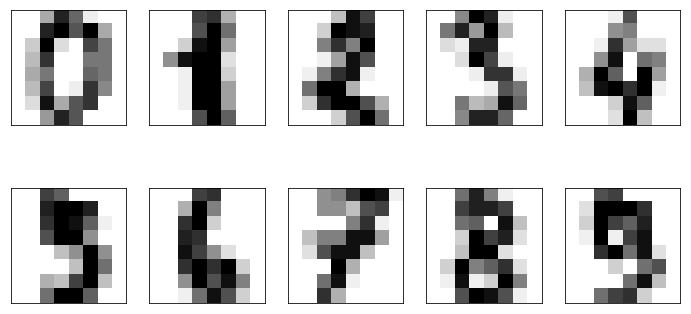

In [158]:
fig,ax = plt.subplots(2,5,figsize=(12,6),subplot_kw=dict(xticks=[],yticks=[]))
for i,axi in enumerate(ax.flatten()):
    _ = axi.imshow(255-digits['images'][i], cmap='gray')
    #_ = axi.axis('off','box')


In [137]:
X = digits['data']
X.shape

(1797, 64)

In [165]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [138]:
pca = PCA(n_components=64).fit(X)

In [154]:
pca.components_[0]

array([ -1.77484909e-19,  -1.73094651e-02,  -2.23428835e-01,
        -1.35913304e-01,  -3.30323092e-02,  -9.66340844e-02,
        -8.32943805e-03,   2.26900082e-03,  -3.20516495e-04,
        -1.19308905e-01,  -2.44451676e-01,   1.48512745e-01,
        -4.67319410e-02,  -2.17740744e-01,  -1.48136776e-02,
         4.47779518e-03,  -4.94136398e-05,  -7.95419375e-02,
         8.33951454e-02,   2.15915342e-01,  -1.72126801e-01,
        -1.63712098e-01,   2.86444452e-02,   4.23251803e-03,
         9.85488574e-05,   6.42319144e-02,   2.54093316e-01,
        -3.56771026e-02,  -2.09462569e-01,  -4.31311420e-02,
         5.13118688e-02,   2.13422732e-04,  -0.00000000e+00,
         1.59950883e-01,   3.68690774e-01,   1.64406827e-01,
         8.52007908e-02,   3.72982855e-02,   2.15866980e-02,
        -0.00000000e+00,   1.28865585e-03,   1.06945287e-01,
         3.03067457e-01,   2.47813041e-01,   2.09637296e-01,
         1.22325219e-02,  -3.69458497e-02,   1.61485028e-03,
         6.93023548e-04,

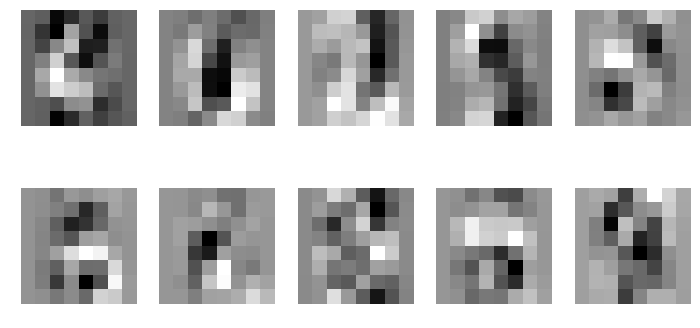

In [152]:
fig,ax = plt.subplots(2,5,figsize=(12,6))
for i,axi in enumerate(ax.flatten()):
    _ = axi.imshow(pca.components_[i].reshape(8,8),cmap='gray')
    _ =  axi.axis('off')

### Example: Face Detection

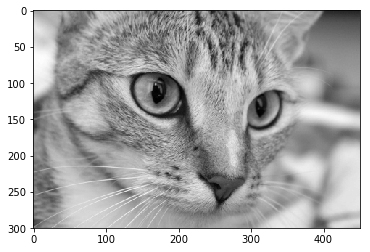

In [24]:
image = color.rgb2gray(data.chelsea())
_ = plt.imshow(image, cmap='gray')

In [27]:
hog_vec, hog_vis = feature.hog(image, visualise=True)

(-0.5, 450.5, 299.5, -0.5)

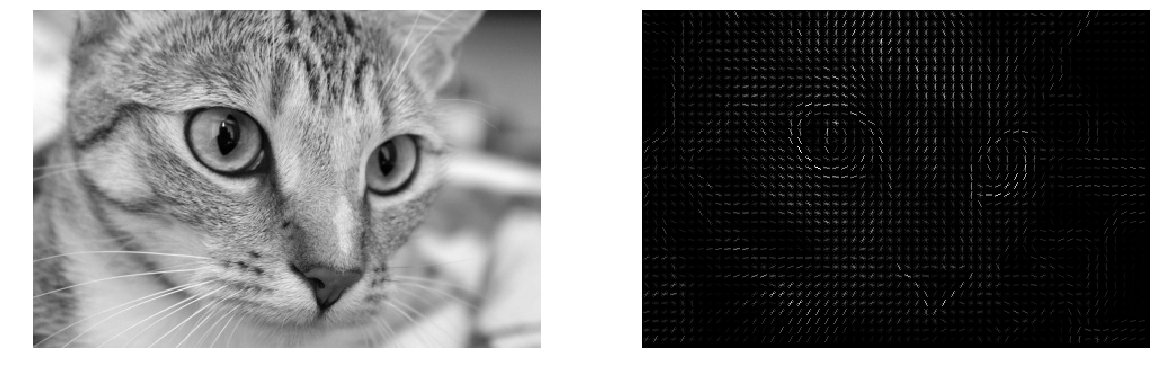

In [167]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
_ = ax[0].imshow(image,cmap='gray')
_ = ax[1].imshow(hog_vis, cmap='gray')
_ = ax[0].axis('off'); _ = ax[1].axis('off')

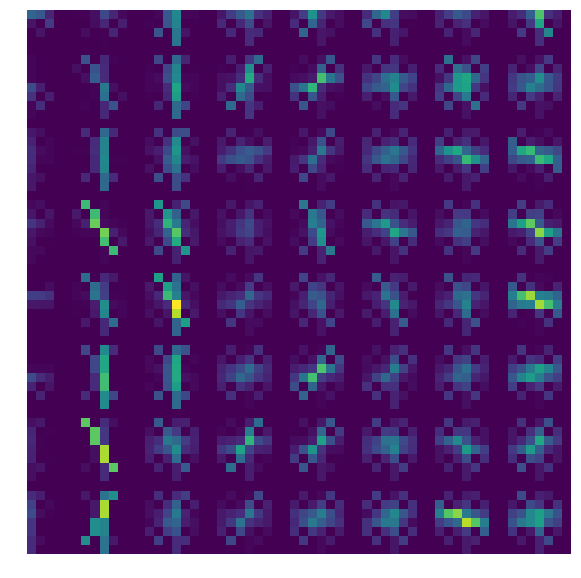

In [171]:
fig = plt.figure(figsize=(10,10))
_ = plt.imshow(hog_vis[20:80,20:80])
_ = plt.gca().axis('off')

In [89]:
# this step may take a while
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images[:1000]
positive_patches.shape

(1000, 62, 47)

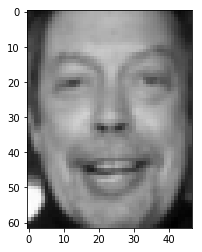

In [90]:
_ = plt.imshow(positive_patches[0],cmap='gray')

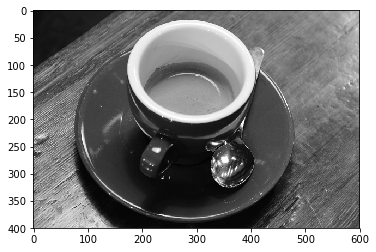

In [91]:
from skimage import data, transform
imgs_to_use = ['camera','text','coins','moon',
               'page','clock','immunohistochemistry',
               'chelsea','coffee','hubble_deep_field']
images = [color.rgb2gray(getattr(data,name)()) for name in imgs_to_use]

_ = plt.imshow(images[8], cmap='gray')

In [92]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale*np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

In [93]:
# this step takes a while
negative_patches = np.vstack([extract_patches(im, 100, scale)
                              for im in images for scale in [0.5,1.0,2.0]])
negative_patches.shape

(3000, 62, 47)

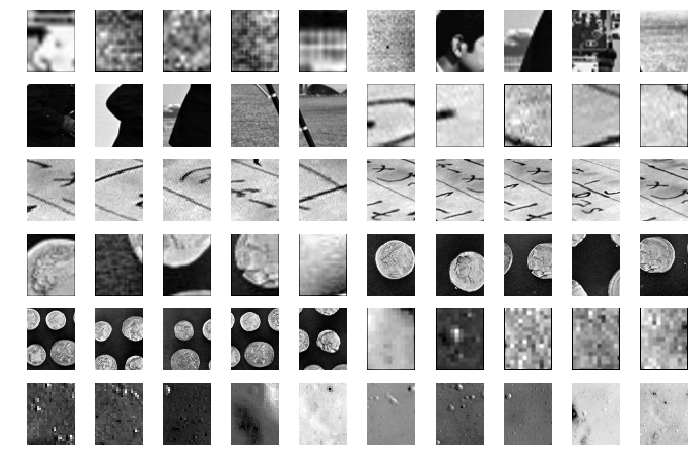

In [112]:
fig,ax = plt.subplots(6,10,figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[20*i], cmap='gray')
    axi.axis('off')

In [95]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,negative_patches)])

y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0] ]= 1

X_train.shape,y_train.shape

((4000, 1215), (4000,))

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

cross_val_score(LogisticRegression(), X_train, y_train)

array([ 0.96851574,  0.97674419,  0.975994  ])

In [97]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(LinearSVC(),{'C':[1.0,2.0,4.0]})
gs.fit(X_train,y_train)
gs.best_score_, gs.best_params_

(0.983, {'C': 4.0})

In [98]:
model = gs.best_estimator_
model.fit(X_train,y_train)

LinearSVC(C=4.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

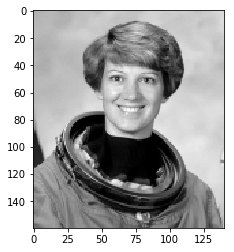

In [173]:
test_image = transform.rescale(color.rgb2gray(skimage.data.astronaut()),0.5)[:160,40:180]
_ = plt.imshow(test_image, cmap='gray')

In [100]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale*s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i+Ni, j:j+Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i,j),patch

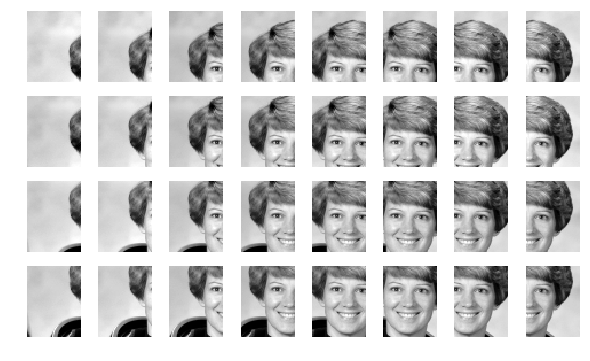

In [180]:
indices, patches = zip(*sliding_window(test_image,istep=10,jstep=10))
fig,ax = plt.subplots(4,8,figsize=(10,6))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(patches[i], cmap='gray')
    _ = axi.axis('off')

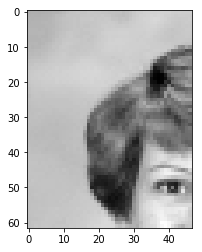

In [181]:
indices, patches = zip(*sliding_window(test_image))
_ = plt.imshow(patches[10], cmap='gray')

In [182]:
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

(1911, 1215)

In [103]:
labels = model.predict(patches_hog)
labels.sum()

35.0

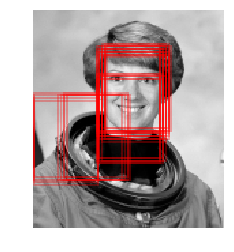

In [104]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni,Nj = positive_patches[0].shape
indices = np.array(indices)

for i,j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j,i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))